Lecture notes - Data storytelling

In [14]:
import pandas as pd

df_annual = pd.read_csv("./data/co2_annmean_mlo.csv", skiprows=43)
df_annual.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [15]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    66 non-null     int64  
 1   mean    66 non-null     float64
 2   unc     66 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


<Axes: title={'center': 'CO$_2$ emissions'}, xlabel='year', ylabel='ppm'>

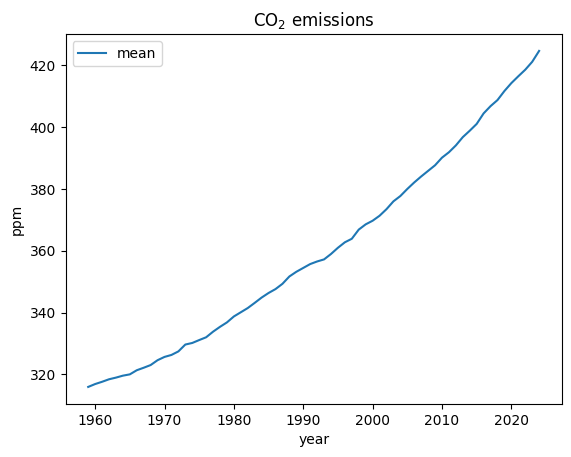

In [16]:
df_annual.plot(x="year", y="mean", ylabel="ppm", title="CO$_2$ emissions")

In [17]:
# CO2 Emissions by Country. # URL of the webpage to scrape
df_country = pd.read_html("https://www.worldometers.info/co2-emissions/co2-emissions-by-country/", index_col=0)[0]
df_country.head()

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,Share of world
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88%
2,United States,4853780240,1.78%,341534046,14.21,12.60%
3,India,2693034100,6.52%,1425423212,1.89,6.99%
4,Russia,1909039310,-1.22%,145579899,13.11,4.96%
5,Japan,1082645430,0.65%,124997578,8.66,2.81%


In [18]:
df_country.columns

Index(['Country', 'CO2 Emissions  (tons, 2022)', '1 Year  Change',
       'Population  (2022)', 'Per  capita', 'Share  of world'],
      dtype='object')

In [19]:
df_country = df_country.rename(columns={"Share of world": "World percentage"})
df_country.head()

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,Share of world
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88%
2,United States,4853780240,1.78%,341534046,14.21,12.60%
3,India,2693034100,6.52%,1425423212,1.89,6.99%
4,Russia,1909039310,-1.22%,145579899,13.11,4.96%
5,Japan,1082645430,0.65%,124997578,8.66,2.81%


In [20]:
df_country = df_country.rename({"Share  of world": "World percentage"}, axis=1)

df_country["World percentage"] = (df_country["World percentage"].str.rstrip("%").astype(float))

df_country.head()

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,World percentage
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88
2,United States,4853780240,1.78%,341534046,14.21,12.60
3,India,2693034100,6.52%,1425423212,1.89,6.99
4,Russia,1909039310,-1.22%,145579899,13.11,4.96
5,Japan,1082645430,0.65%,124997578,8.66,2.81


<Axes: xlabel='Country'>

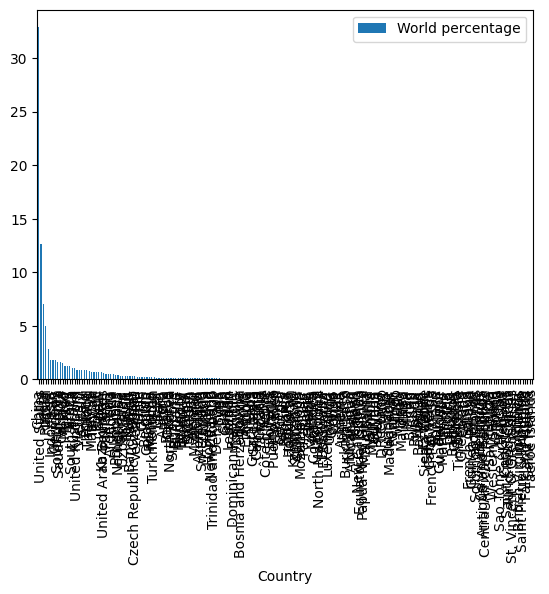

In [21]:
df_country.plot(kind="bar", x="Country", y="World percentage")

<Axes: xlabel='Country'>

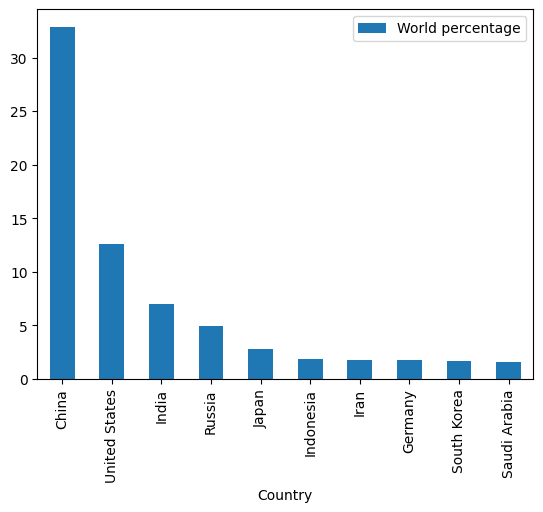

In [22]:
df_country.head(10).plot(kind="bar", x="Country", y="World percentage")

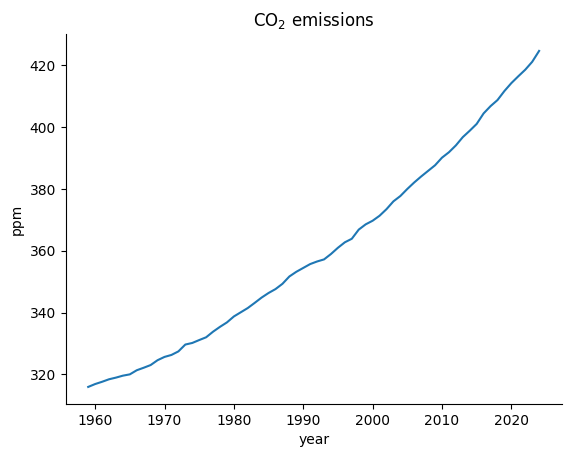

In [23]:
ax_annual = df_annual.plot(x="year", y="mean", ylabel="ppm", title="CO$_2$ emissions")

# Remove top and bottom spine
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)

# Remove legend 
ax_annual.legend().set_visible(False)

# Link to Anatomy of a figure: https://matplotlib.org/stable/gallery/showcase/anatomy.html

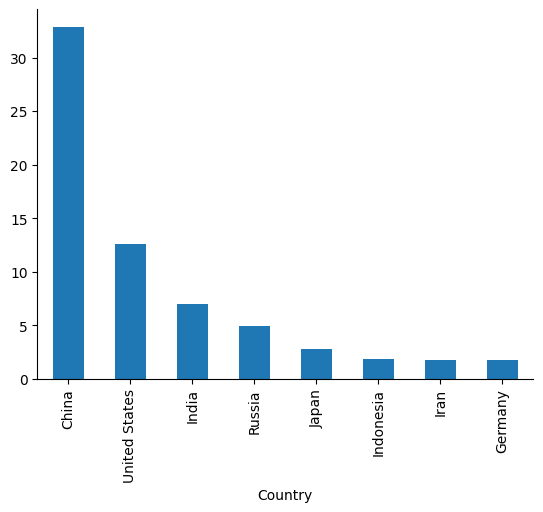

In [24]:
# Create a bar chart showing the top 8 countries
ax_percentage = df_country.head(8).plot(kind="bar", x="Country", y="World percentage")

# Remove top and right spines
ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)

# Remove legend
ax_percentage.legend().set_visible(False)

Attention
Here attention is referred to making your visuals clearly mark the thing you want the audience to focus their attention towards. A way to achieve this is to use color sparingly and in a strategic way.

Contrast
We'll be using contrast in order to attract attention. The axis information will have low contrast to the background while the important information will have higher contrast compared to the background. For the bar chart contrast will be used to direct audience towards the top three emitters.

Descriptive title and labels
The norm has been a short title and labels, which are not descriptive enough and doesn't add much information to the visuals. Here we'll use a descriptive title that conveys our message.

<Axes: title={'left': 'The annual mean of CO$_2$ emissions measured\nin Mauna Loa has increased every year since 1959'}, xlabel='YEARS FROM 1959', ylabel='CO$_2$ MOLE FRACTION IN PPM'>

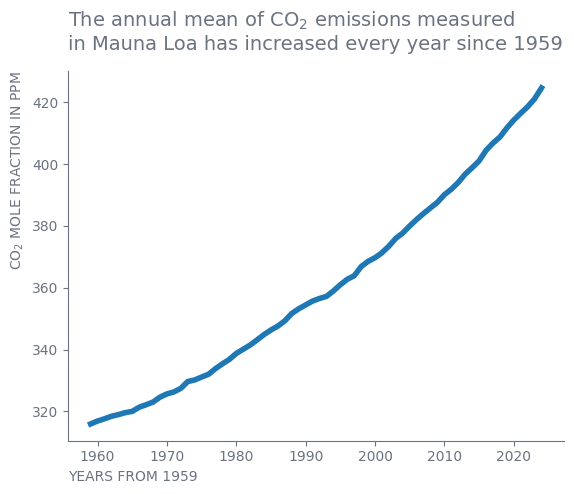

In [25]:
ax_annual = df_annual.plot(x="year", y="mean", linewidth=4)

GRAY1 = "#6b7280"

ax_annual.tick_params(axis="both", colors=GRAY1)
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)
ax_annual.spines["left"].set_color(GRAY1)
ax_annual.spines["bottom"].set_color(GRAY1)

ax_annual.set_xlabel("YEARS FROM 1959", loc="left", color=GRAY1)
ax_annual.set_ylabel(r"CO$_2$ MOLE FRACTION IN PPM", loc="top", color=GRAY1)
ax_annual.set_title(
    "The annual mean of CO$_2$ emissions measured\nin Mauna Loa has increased every year since 1959",
                     loc="left",
                     pad=15,
                     color=GRAY1,
                     fontsize=14
                     )

ax_annual.legend().set_visible(False)

ax_annual

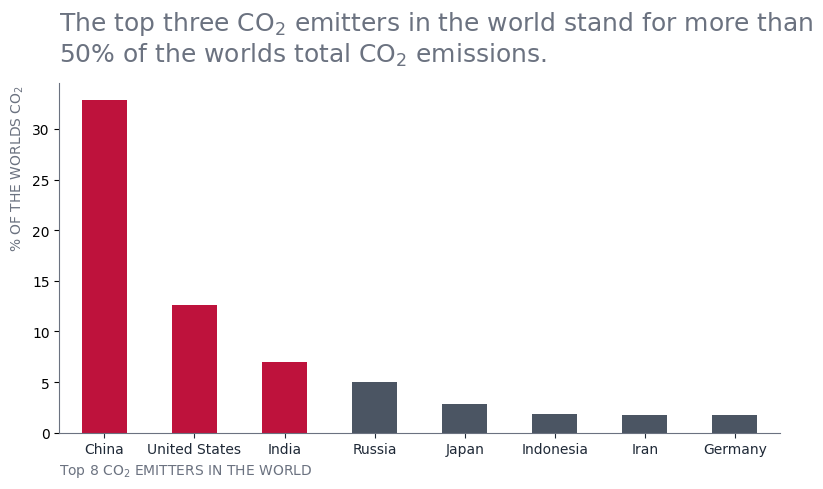

In [26]:
number_countries = 8
top_emitter = 3
red, gray = "#be123c", "#4b5563"
colors = [red] * top_emitter + [gray] * (number_countries - top_emitter)

ax_country = df_country.head(number_countries).plot(
    kind="bar", y="World percentage", x="Country", rot=0, color=colors)
ax_country.legend().set_visible(False)

ax_country.set_xlabel("Top 8 CO$_2$ EMITTERS IN THE WORLD", loc="left", color=GRAY1)
ax_country.set_ylabel("% OF THE WORLDS CO$_2$ ", loc="top", color=GRAY1)
ax_country.tick_params(axis="x", colors="#1f2937")

ax_country.set_title("The top three CO$_2$ emitters in the world stand for more than\n50% of the worlds total CO$_2$ emissions.",
                     loc="left",
                     pad=15,
                     color=GRAY1,
                     fontsize=18,
                     )

ax_annual.tick_params(axis="both", colors=GRAY1)
ax_country.spines["top"].set_visible(False)
ax_country.spines["right"].set_visible(False)
ax_country.spines["left"].set_color(GRAY1)
ax_country.spines["bottom"].set_color(GRAY1)

fig = ax_country.get_figure()

fig.set_size_inches(8, 5)
fig.tight_layout()
